/tmp/ipykernel_1189696/525704035.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', fontsize=14, frameon=False)


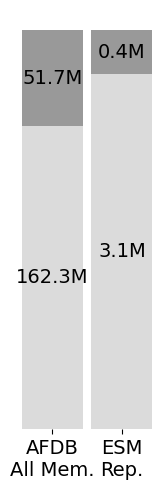

Chart saved as SVG: panel_a.svg


In [23]:
# main figure a 

import matplotlib.pyplot as plt

# Data for the chart
datasets = ['AFDB\nAll Mem.', "ESM\nRep."]
not_novel = [214, 3.54]  # in Millions
cat_2_or_more = [51.7, 0.394]  # in Millions
cat_1_or_less = [not_novel[0] - cat_2_or_more[0], not_novel[1] - cat_2_or_more[1]]  # Remaining values

# Data as percentages relative to their not_novel
cat_2_or_more_pct = [value / total for value, total in zip(cat_2_or_more, not_novel)]
cat_1_or_less_pct = [value / total for value, total in zip(cat_1_or_less, not_novel)]

# Plotting the updated stacked bar chart with requested changes
fig, ax = plt.subplots(figsize=(1.8, 5))

# Creating the bars with thinner width and closer spacing
bar_width = 0.35
x_pos = [0, 0.4]  # Closer spacing between bars
ax.bar(x_pos, cat_1_or_less_pct, bar_width, color='lightgray', alpha=0.8)
ax.bar(x_pos, cat_2_or_more_pct, bar_width, bottom=cat_1_or_less_pct, color='gray', alpha=0.8)

# Adding raw number annotations with adjusted label positions
for i, (value_raw, bottom_raw, bottom_pct) in enumerate(zip(cat_2_or_more, cat_1_or_less, cat_1_or_less_pct)):
    # For ≥ 2 CATH (top of the bar)
    ax.text(x_pos[i], bottom_pct + cat_2_or_more_pct[i] / 2, f'{value_raw:.1f}M',
            ha='center', va='center', fontsize=14, color='black')
    # For ≤ 1 CATH (bottom of the bar)
    ax.text(x_pos[i], bottom_pct / 2, f'{bottom_raw:.1f}M',
            ha='center', va='center', fontsize=14, color='black')

# Customize chart
ax.set_xticks(x_pos)
ax.set_xticklabels(datasets, fontsize=14)
ax.legend(loc='upper left', fontsize=14, frameon=False)

# Remove y-axis label and grid
ax.set_yticks([])
ax.set_yticklabels([])
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Save the chart as an SVG file
output_path = "panel_a.svg"
plt.tight_layout()
plt.savefig(output_path, format='svg')

# Display the chart
plt.show()

print(f"Chart saved as SVG: {output_path}")


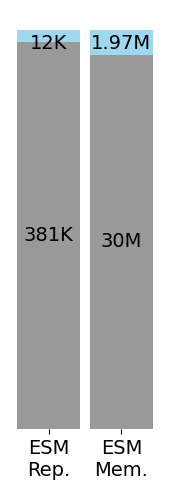

Duplicated plot saved as SVG: panel_b.svg


In [22]:
# main figure b 

# Reimporting required libraries and redefining data due to state reset
import matplotlib.pyplot as plt

# Data for the duplicated plot
datasets = ['ESM\nRep.', 'ESM\nMem.']
not_novel = [381, 30030]  # Bottom (gray section) in K
top_values = [12, 1970]  # Top (blue section) in K

# Normalize values to percentages for the stacked bar chart
total_heights = [not_novel[i] + top_values[i] for i in range(len(not_novel))]
bottom_pct = [not_novel[i] / total_heights[i] for i in range(len(not_novel))]
top_pct = [top_values[i] / total_heights[i] for i in range(len(not_novel))]

# Plotting the duplicated plot
fig, ax = plt.subplots(figsize=(1.8, 5))

# Creating the bars
bar_width = 0.35
x_pos = [0, 0.4]  # Closer spacing between bars
ax.bar(x_pos, bottom_pct, bar_width, color='gray', alpha=0.8)
ax.bar(x_pos, top_pct, bar_width, bottom=bottom_pct, color='skyblue', alpha=0.8)

# Adding annotations for the top section (light blue)
for i, value in enumerate(top_values):
    # ax.text(x_pos[i], bottom_pct[i] + top_pct[i] + 0.01, f'{value}K' if value < 1000 else f'{value / 1000:.2f}M',
    ax.text(x_pos[i], (top_pct[i] + bottom_pct[i]) - 0.057 , f'{value}K' if value < 1000 else f'{value / 1000:.2f}M',
            ha='center', va='bottom', fontsize=14, color='black')

# Adding annotations for the bottom section (gray)
for i, value in enumerate(not_novel):
    ax.text(x_pos[i], bottom_pct[i] / 2, f'{value}K' if value < 1000 else f'{value / 1000:.0f}M',
            ha='center', va='center', fontsize=14, color='black')

# Customizing x-axis labels
ax.set_xticks(x_pos)
ax.set_xticklabels(datasets, fontsize=14)  #  fontweight='bold'

# Removing y-axis and grid
ax.set_yticks([])
ax.set_yticklabels([])
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Save the duplicated plot as an SVG file
output_path = "panel_b.svg"
plt.tight_layout()
plt.savefig(output_path, format='svg')

# Display the plot
plt.show()

print(f"Duplicated plot saved as SVG: {output_path}")
